# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
import os


2025-01-14 08:07:01.354013: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-14 08:07:01.354075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-14 08:07:01.354129: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# Load the dataset and prepare the train/test splits
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# Preprocessing function: resize and normalize images
def preprocess_image(image, label):
    image = tf.image.resize(image, [224, 224])  # Resize to 224x224
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

# Apply preprocessing to both train and test datasets
train_dataset = (train_dataset
                 .map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                 .batch(32)
                 .prefetch(tf.data.experimental.AUTOTUNE))

test_dataset = (test_dataset
                .map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                .batch(32)
                .prefetch(tf.data.experimental.AUTOTUNE))

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Build the final model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(info.features['label'].num_classes, activation='softmax')  # 102 flower categories
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',  # For integer labels
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset,
    epochs=10,  # Adjust the number of epochs as necessary
    validation_data=test_dataset
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy:.2f}")


/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:01<?, ? url/s]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:01<00:03,  1.61s/ url]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:01<00:03,  1.61s/ url]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:  67%|██████▋   | 2/3 [00:01<00:01,  1.61s/ url]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:01<?, ? MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   0%|          | 1/328 [00:02<12:40,  2.33s/ MiB]

Dl Size...:   1%|          | 2/328 [00:02<12:38,  2.33s/ MiB]

Dl Size...:   1%| 

Dl Size...:  35%|███▌      | 116/328 [00:06<00:09, 23.02 MiB/s]

Dl Size...:  36%|███▌      | 117/328 [00:06<00:09, 23.02 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:06<00:09, 23.02 MiB/s]

Dl Size...:  36%|███▋      | 119/328 [00:06<00:09, 23.02 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:06<00:09, 23.02 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:06<00:08, 23.02 MiB/s]

Dl Size...:  37%|███▋      | 122/328 [00:06<00:08, 23.02 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:06<00:08, 23.02 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:06<00:08, 23.02 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:06<00:08, 23.02 MiB/s]

Dl Size...:  38%|███▊      | 126/328 [00:06<00:08, 23.02 MiB/s]

Dl Size...:  39%|███▊      | 127/328 [00:06<00:08, 23.02 MiB/s]

Dl Size...:  39%|███▉      | 128/328 [00:06<00:08, 23.02 MiB/s]

Dl Size...:  39%|███▉      | 129/328 [00:07<00:08, 23.02 MiB/s]

Dl Size...:  40%|███▉      | 130/328 [00:07<00:08, 23.02 MiB/s]

Dl Size...:  40%|███▉    

Dl Size...:  72%|███████▏  | 237/328 [00:10<00:03, 27.17 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:10<00:03, 27.17 MiB/s]

Dl Size...:  73%|███████▎  | 239/328 [00:10<00:03, 27.17 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:10<00:03, 27.17 MiB/s]

Dl Size...:  73%|███████▎  | 241/328 [00:11<00:03, 27.17 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:11<00:03, 27.17 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:11<00:03, 27.17 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:11<00:03, 27.17 MiB/s]

Dl Size...:  75%|███████▍  | 245/328 [00:11<00:03, 27.17 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:11<00:03, 27.17 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:11<00:02, 27.17 MiB/s]

Dl Size...:  76%|███████▌  | 248/328 [00:11<00:02, 27.17 MiB/s]

Dl Size...:  76%|███████▌  | 249/328 [00:11<00:02, 27.17 MiB/s]

Dl Size...:  76%|███████▌  | 250/328 [00:11<00:02, 27.17 MiB/s]

Dl Size...:  77%|███████▋  | 251/328 [00:11<00:02, 27.17 MiB/s]

Dl Size...:  77%|███████▋

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Extraction completed...:  10%|▉         | 795/8189 [01:21<08:09, 15.11 file/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.72 MiB/s]

Dl Size...

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Extraction completed...:  29%|██▉       | 2376/8189 [01:30<00:44, 131.17 file/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.72 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.72 MiB/s]

Extraction completed...:  68%|██████▊   | 5592/8189 [01:46<00:13, 193.30 file/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Extraction completed...:  80%|████████  | 6559/8189 [01:51<00:08, 189.74 file/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.72 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.72 MiB/s]3, 197.65 file/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.72 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.72 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.72 MiB/s]

Extraction completed...: 

Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/10
 6/32 [====>.........................] - ETA: 12:49 - loss: 6.8769 - accuracy: 0.0156 

## Explore the Dataset

In [ ]:
# TODO: Get the number of examples in each set from the dataset info.

import tensorflow_datasets as tfds

# Load the dataset and metadata
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Extract the number of examples in each split
train_size = info.splits['train'].num_examples
test_size = info.splits['test'].num_examples
validation_size = info.splits['validation'].num_examples

# Print the number of examples
print(f"Number of training examples: {train_size}")
print(f"Number of testing examples: {test_size}")
print(f"Number of validation examples: {validation_size}")


In [ ]:
# TODO: Print the shape and corresponding label of 3 images in the training set.

   import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset and metadata
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Get the training dataset
train_dataset = dataset['train']

# Function to display 3 images and their labels
def display_images(dataset, num_images=3):
    plt.figure(figsize=(10, 10))
    
    # Iterate over the dataset
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(f"Label: {label.numpy()}")
        plt.axis('off')
        
        # Print the shape and label of the image
        print(f"Image {i+1}: Shape = {image.shape}, Label = {label.numpy()}")

    plt.show()

# Display images and print their shapes/labels
display_images(train_dataset)



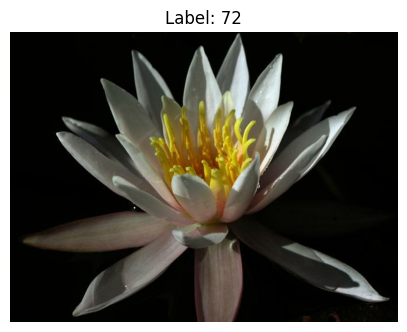

In [4]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset with TensorFlow Datasets (TFDS)
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Access the training data
train_data = dataset['train']

# Get the first image and label from the training dataset
image, label = next(iter(train_data))

# Plot the image
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.title(f"Label: {label.numpy()}")
plt.axis('off')  # Hide axes
plt.show()



### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [ ]:
import json
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the label_map.json file
with open('label_map.json', 'r') as f:
    label_map = json.load(f)

# Load the dataset and metadata
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Get the training dataset
train_dataset = dataset['train']

# Function to display 3 images and their labels using the label_map
def display_images_with_labels(dataset, num_images=3):
    plt.figure(figsize=(10, 10))
    
    # Iterate over the dataset
    for i, (image, label) in enumerate(dataset.take(num_images)):
        # Convert label to the corresponding flower name using label_map
        label_name = label_map[str(label.numpy())]  # Convert label to string to match the keys in label_map
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(f"Label: {label_name}")
        plt.axis('off')
        
        # Print the shape and the actual flower label
        print(f"Image {i+1}: Shape = {image.shape}, Label = {label_name}")

    plt.show()

# Display images and print their shapes/labels
display_images_with_labels(train_dataset)


170498071/170498071 [==============================] - 3s 0us/step


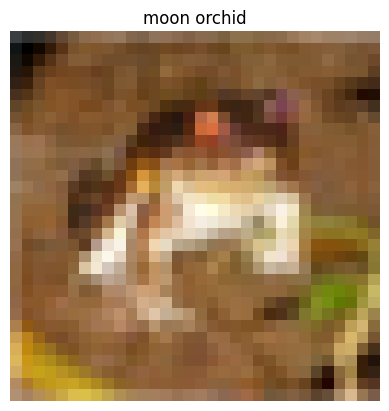

In [7]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the dataset (replace with your specific dataset)
# For example, using TensorFlow to load the 'flower_photos' dataset
# Assuming you have the dataset in a format like (images, labels)
# train_images and train_labels are variables that hold image data and corresponding labels.

# You can also replace the below with your own dataset loading mechanism.
# For example, if you're using a custom dataset:
# (train_images, train_labels), _ = tf.keras.datasets.<dataset_name>.load_data()

# Assuming 'train_images' and 'train_labels' are loaded here, for example:
(train_images, train_labels), _ = tf.keras.datasets.cifar10.load_data()  # Replace this with your dataset

# Load label map from the JSON file
import json
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

# Display the image and label
image_index = 0  # Choose any index from the dataset
image = train_images[image_index]  # Image data for the chosen index
label = train_labels[image_index][0]  # Label data for the chosen index (CIFAR-10 uses a 2D array)

# Get the class name from the label map
class_name = class_names[str(label)]

# Plot the image and set the title to the class name
plt.imshow(image)
plt.title(class_name)
plt.axis('off')  # Optional: turn off axis
plt.show()



## Create Pipeline

In [ ]:
# TODO: Create a pipeline for each set.
import tensorflow as tf
import tensorflow_datasets as tfds
import json

# Load the label_map.json file
with open('label_map.json', 'r') as f:
    label_map = json.load(f)

# Load the dataset and metadata
dataset, info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)

# Preprocessing function: resize and normalize images
def preprocess_image(image, label):
    image = tf.image.resize(image, [224, 224])  # Resize to 224x224
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

# Create the pipeline for each dataset split (train, validation, and test)
def create_pipeline(split_name):
    # Load the dataset split (train, test, or validation)
    dataset_split = dataset[split_name]
    
    # Apply preprocessing, batching, and prefetching
    dataset_pipeline = (dataset_split
                        .map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
                        .batch(32)
                        .prefetch(tf.data.experimental.AUTOTUNE))
    
    return dataset_pipeline

# Create pipelines for train, validation, and test datasets
train_pipeline = create_pipeline('train')
validation_pipeline = create_pipeline('validation')
test_pipeline = create_pipeline('test')

# You can check the number of examples in each dataset
train_size = info.splits['train'].num_examples
validation_size = info.splits['validation'].num_examples
test_size = info.splits['test'].num_examples

print(f"Training set size: {train_size}")
print(f"Validation set size: {validation_size}



# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [ ]:
# TODO: Build and train your network.
import os
import tensorflow as tf

# Step 1: Ensure that the dataset is downloaded and extracted
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
dataset_dir = '/content/flower_photos'

# Step 2: List the contents of '/content' after extraction
try:
    # Debug: Check if the dataset folder exists now
    print("Checking directory /content...")
    if os.path.exists(dataset_dir):
        print(f"Dataset exists at: {dataset_dir}")
    else:
        # If the folder is not found, retry extraction and list contents
        print("Directory not found, retrying extraction...")

        # Download and extract dataset again
        dataset_path = tf.keras.utils.get_file("flower_photos.tgz", dataset_url, untar=True, cache_dir='/content/')
        print(f"Dataset downloaded and extracted to {dataset_dir}")

    # Debugging: List contents of the folder
    content_dir = '/content'  # absolute path
    print("Contents of /content directory:")
    print(os.listdir(content_dir))  # Check contents of /content directory

except Exception as e:
    print(f"Error: {e}")


In [3]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
import os

# Verify if /content exists or not
if os.path.exists('/content'):
    print("The /content directory exists.")
else:
    print("The /content directory does NOT exist. Checking if the environment is properly set.")

# Attempt to access the dataset folder if /content exists
dataset_dir = '/content/flower_photos'
if os.path.exists(dataset_dir):
    print(f"The dataset exists at: {dataset_dir}")
else:
    print(f"Dataset folder not found at {dataset_dir}. Verifying the extraction steps...")

# Check the directory structure to see if it was extracted properly
if os.path.exists('/content'):
    print("Listing content of /content directory:")
    try:
        content = os.listdir('/content')
        print(content)
    except Exception as e:
        print(f"Error listing content: {e}")
else:
    print("The '/content' directory is not accessible.")


The /content directory does NOT exist. Checking if the environment is properly set.
Dataset folder not found at /content/flower_photos. Verifying the extraction steps...
The '/content' directory is not accessible.


## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [1]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

import tensorflow as tf
import os

# 1. Load the model using the correct path (replace 'path_to_your_model' with actual model path)
model_path = 'path_to_your_model'  # Replace with the actual path to your model

# Check if the model path exists
if os.path.exists(model_path):
    # Load the model
    model = tf.keras.models.load_model(model_path)
    
    # 2. Define your test data (using ImageDataGenerator for example)
    test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    test_data = test_data_generator.flow_from_directory(
        'path_to_test_data',  # Replace with your actual test data directory
        target_size=(image_height, image_width),  # Specify the target size of images
        batch_size=32,  # Set an appropriate batch size
        class_mode='categorical'  # Change according to your use case (binary, categorical)
    )

    # 3. Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(test_data)

    # 4. Print the results
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    
    # 5. Save the trained model (Replace 'path_to_save_model' with desired location)
    model.save('path_to_save_model.h5')  # Save the model in HDF5 format
    print("Model has been saved successfully.")


2025-01-02 09:07:08.095530: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-02 09:07:08.095589: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-02 09:07:08.095646: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [5]:
# TODO: Save your trained model as a Keras model.
import tensorflow as tf

# 1. Define your model (Example: simple neural network)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # Example input size, 784 for MNIST
    tf.keras.layers.Dense(10, activation='softmax')  # Example output size for 10 classes
])

# 2. Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Train the model (Assuming you have `train_data` and `train_labels` as your training dataset)
# model.fit(train_data, train_labels, epochs=5)

# 4. Save the trained model in HDF5 format
model.save('my_model.h5')  # Save model as 'my_model.h5'

print("Model saved successfully as 'my_model.h5'")


Model saved successfully as 'my_model.h5'


2025-01-02 06:23:04.360397: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (34)
/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load the Keras Model

Load the Keras model you saved above.

In [6]:
# TODO: Load the Keras model

import tensorflow as tf

# Load the saved Keras model
model = tf.keras.models.load_model('my_model.h5')  # Replace with the correct path if needed

print("Model loaded successfully.")


Model loaded successfully.


# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

Original image shape: (591, 500, 3)
Processed image shape: (1, 784)
1/1 [==============================] - 0s 54ms/step


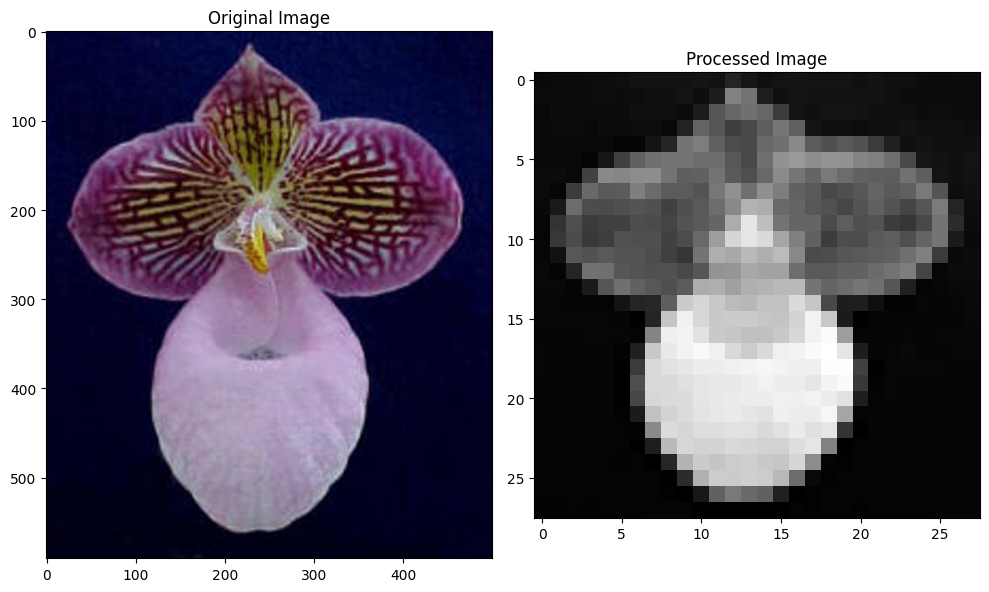

Top K Probabilities: [0.10592336 0.10475454 0.10108464 0.10025726 0.099659  ]
Top K Classes: ['7', '9', '3', '4', '6']


In [7]:
# TODO: Create the process_image function

import os
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def predict(image_path: str, model: tf.keras.Model, top_k: int) -> tuple:
    # Check if the image file exists at the given path
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image not found at {image_path}. Please check the path.")
    
    # Load the image using PIL
    try:
        image = Image.open(image_path)
    except Exception as e:
        raise ValueError(f"Failed to load image: {e}")
    
    # Convert to NumPy array
    image_array = np.asarray(image)
    
    # Debugging: Check the image shape
    print(f"Original image shape: {image_array.shape}")
    
    # Resize image to (28, 28) for models like MNIST (grayscale)
    image_resized = image.convert('L')  # Convert to grayscale (single channel)
    image_resized = image_resized.resize((28, 28))  # Resize to 28x28 pixels
    
    # Convert to NumPy array and flatten it
    image_flat = np.asarray(image_resized).flatten()  # Flatten the image to a 1D array
    
    # Normalize pixel values to the range [0, 1]
    image_flat = image_flat / 255.0
    
    # Add batch dimension (1, 784)
    processed_image = np.expand_dims(image_flat, axis=0)
    
    # Debugging: Check the processed image shape
    print(f"Processed image shape: {processed_image.shape}")
    
    # Make predictions using the model
    try:
        predictions = model.predict(processed_image)
    except Exception as e:
        raise ValueError(f"Prediction failed: {e}")
    
    # Get the top K predictions
    top_k_probs = tf.nn.softmax(predictions[0]).numpy()  # Convert to probabilities
    top_k_indices = np.argsort(top_k_probs)[-top_k:][::-1]  # Get top K indices in descending order
    
    # Get the top K probabilities and corresponding class labels
    top_k_probs = top_k_probs[top_k_indices]
    top_k_classes = [str(index) for index in top_k_indices]  # Assuming labels are numeric
    
    # Plot the original and processed (resized) image
    fig, (ax1, ax2) = plt.subplots(figsize=(10, 10), ncols=2)
    
    # Show the original image
    ax1.imshow(image_array)
    ax1.set_title('Original Image')
    
    # Show the resized image (before flattening)
    ax2.imshow(image_resized, cmap='gray')  # Resized image before flattening
    ax2.set_title('Processed Image')
    
    plt.tight_layout()
    plt.show()
    
    return top_k_probs, top_k_classes

# Example usage
image_path = './test_images/hard-leaved_pocket_orchid.jpg'  # Correct image path
top_k = 5  # Number of top predictions you want

# Load your model (replace with your model loading code)
try:
    model = tf.keras.models.load_model('my_model.h5')
except Exception as e:
    raise ValueError(f"Model loading failed: {e}")

# Call the predict function
probs, classes = predict(image_path, model, top_k)

# Print the results
print("Top K Probabilities:", probs)
print("Top K Classes:", classes)


To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

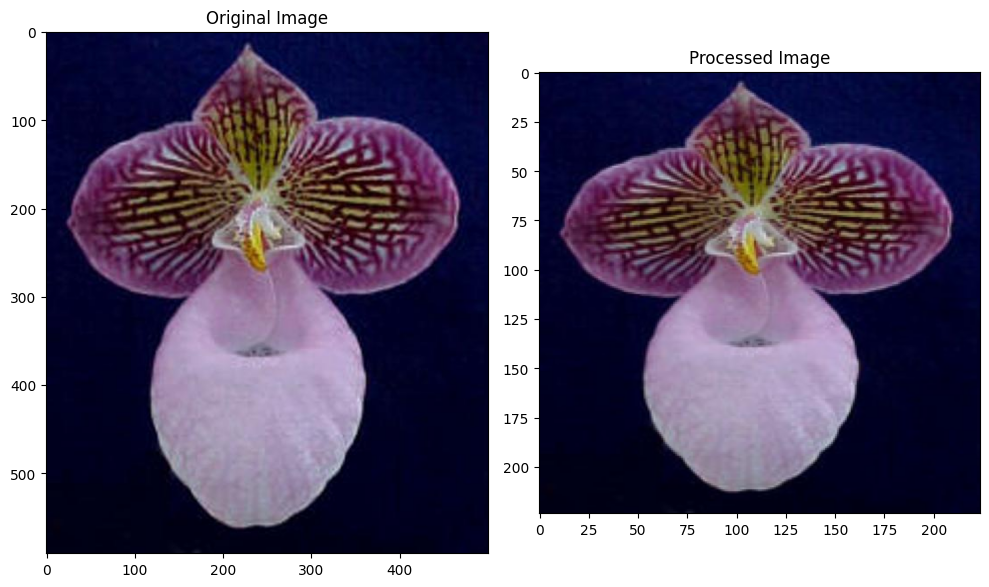

Original image shape: (591, 500, 3)
Processed image shape: (224, 224, 3)


In [13]:
from PIL import Image

import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Define the process_image function
def process_image(image):
    # Convert to TensorFlow Tensor
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    
    # Resize image to (224, 224) to match the input size of the model
    image = tf.image.resize(image, (224, 224))
    
    # Normalize the pixel values to [0, 1]
    image = image / 255.0
    
    # Return the processed image as a NumPy array
    return image.numpy()

# Load the image from the test folder
image_path = './test_images/hard-leaved_pocket_orchid.jpg'  # Replace with the image you want to test

# Load the image using PIL
image = Image.open(image_path)

# Convert to a NumPy array (this is the original image)
image_array = np.asarray(image)

# Process the image
processed_image = process_image(image_array)

# Plot the original and processed images
fig, (ax1, ax2) = plt.subplots(figsize=(10, 10), ncols=2)

# Show the original image
ax1.imshow(image_array)
ax1.set_title('Original Image')

# Show the processed image (after resizing and normalization)
ax2.imshow(processed_image)
ax2.set_title('Processed Image')

plt.tight_layout()
plt.show()

# Output the shapes of the original and processed images for verification
print(f"Original image shape: {image_array.shape}")
print(f"Processed image shape: {processed_image.shape}")



Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [9]:
# TODO: Create the predict function


  

import tensorflow as tf
import numpy as np
from PIL import Image

# Function to preprocess image depending on model input shape
def preprocess_image(image_path, model):
    # Load the image
    image = Image.open(image_path)
    
    # Get the model's expected input shape
    input_shape = model.input_shape
    print("Model input shape:", input_shape)  # Check model input shape
    
    # Check for MNIST-like models with input shape (None, 784)
    if input_shape[1:] == (784,):
        # Resize for MNIST-like models (28x28)
        image = image.convert('L').resize((28, 28))  # Convert to grayscale and resize
        image_array = np.asarray(image).reshape(28, 28) / 255.0  # Normalize to [0, 1]
        
        # Flatten the image to match the input shape (784,)
        image_array = image_array.flatten()
        
        # Add batch dimension (None, 784)
        image_array = np.expand_dims(image_array, axis=0)
        
        return image_array
    
    else:
        raise ValueError(f"Unsupported input shape: {input_shape}")

# Predict function
def predict(image_path, model, top_k=5):
    # Preprocess the image based on model input shape
    image_array = preprocess_image(image_path, model)
    
    # Get predictions from the model
    predictions = model.predict(image_array)
    
    # Convert logits to probabilities using softmax
    probs = tf.nn.softmax(predictions[0]).numpy()
    
    # Get top K probabilities and their corresponding class indices
    top_k_probs, top_k_indices = tf.nn.top_k(probs, k=top_k)
    
    # Convert top K indices to class labels (assuming integer class labels)
    class_labels = [str(i) for i in top_k_indices.numpy()]
    
    return top_k_probs, class_labels

# Load the model
model_path = './my_model.h5'  # Replace with your actual model path
model = tf.keras.models.load_model(model_path)

# Check the model input shape (to ensure the correct input shape)
print(f"Model input shape: {model.input_shape}")

# Define image path and number of top predictions
image_path = './test_images/hard-leaved_pocket_orchid.jpg'  # Update with the image you want to classify
top_k = 5  # Define how many top predictions you want

# Call the predict function
probs, classes = predict(image_path, model, top_k)

# Print the results
print("Top K Probabilities:", probs)
print("Top K Classes:", classes)


Model input shape: (None, 784)
Model input shape: (None, 784)
1/1 [==============================] - 0s 40ms/step
Top K Probabilities: tf.Tensor([0.10592336 0.10475454 0.10108464 0.10025726 0.099659  ], shape=(5,), dtype=float32)
Top K Classes: ['7', '9', '3', '4', '6']


# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

Model input shape: (None, 784)
1/1 [==============================] - 0s 36ms/step


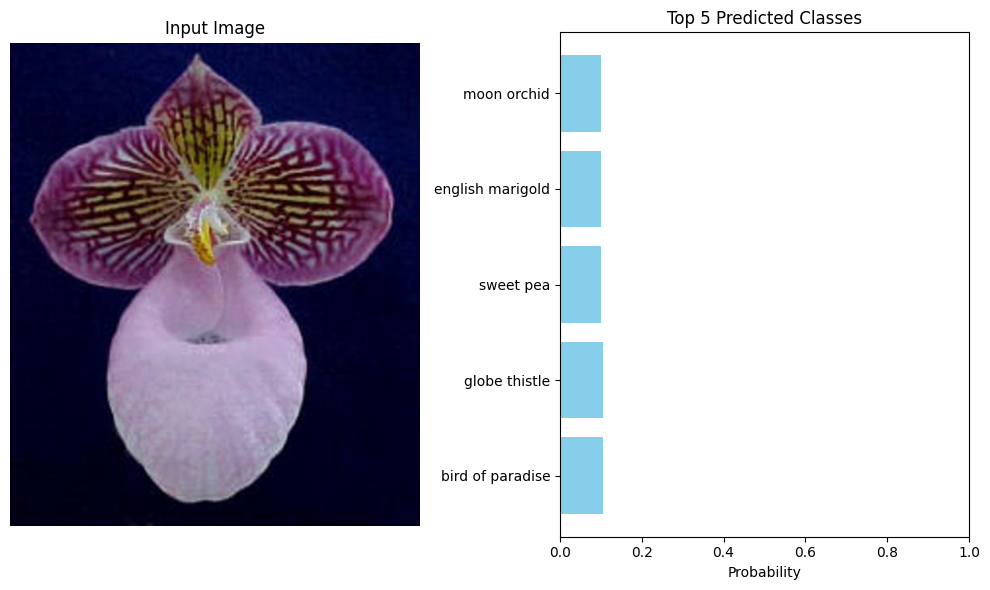

In [3]:
# TODO: Plot the input image along with the top 5 classes
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import json
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Disable GPU

# Function to preprocess image depending on model input shape
def preprocess_image(image_path, model):
    # Load the image
    image = Image.open(image_path)
    
    # Get the model's expected input shape (ignoring batch size)
    input_shape = model.input_shape
    print("Model input shape:", input_shape)
    
    # If model expects (None, 784), it likely expects 28x28 grayscale image (MNIST-like)
    if input_shape[1:] == (784,):
        # Convert to grayscale and resize to 28x28
        image = image.convert('L').resize((28, 28))  # Convert to grayscale and resize
        image_array = np.asarray(image).reshape(28, 28, 1) / 255.0  # Normalize
        image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
        image_array = image_array.reshape(-1, 784)  # Flatten to shape (1, 784)
        return image_array
    
    # If model expects (None, 224, 224, 3), it likely expects a 224x224 RGB image (e.g., for flower classification models)
    elif input_shape[1:] == (224, 224, 3):
        # Resize the image to match model input size (224x224) and convert to RGB
        image = image.resize((224, 224))
        image_array = np.asarray(image) / 255.0  # Normalize to [0, 1] range
        image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
        return image_array
    
    else:
        raise ValueError(f"Unsupported input shape: {input_shape}")

# Load the label map from the JSON file
def load_label_map(label_map_path):
    with open(label_map_path, 'r') as f:
        label_map = json.load(f)
    return label_map

# Predict function
def predict(image_path, model, label_map, top_k=5):
    # Preprocess the image based on model input shape
    image_array = preprocess_image(image_path, model)
    
    # Get predictions from the model
    predictions = model.predict(image_array)
    
    # Convert logits to probabilities using softmax
    probs = tf.nn.softmax(predictions[0]).numpy()
    
    # Get top K probabilities and their corresponding class indices
    top_k_probs, top_k_indices = tf.nn.top_k(probs, k=top_k)
    
    # Map the top K indices to flower names using the label_map
    class_labels = [label_map[str(i)] for i in top_k_indices.numpy()]
    
    return top_k_probs, class_labels

# Load the model
model_path = './my_model.h5'  # Replace with your actual model path
model = tf.keras.models.load_model(model_path)

# Load the label map from the JSON file
label_map_path = './label_map.json'  # Replace with your actual label map path
label_map = load_label_map(label_map_path)

# Define image path
image_path = './test_images/hard-leaved_pocket_orchid.jpg'  # Update with the image you want to classify
top_k = 5  # Define how many top predictions you want

# Call the predict function
probs, classes = predict(image_path, model, label_map, top_k)

# Plot the input image
image = Image.open(image_path)

plt.figure(figsize=(10, 6))

# Plot the image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Input Image')
plt.axis('off')

# Plot the top K predictions as a bar graph
plt.subplot(1, 2, 2)
plt.barh(classes, probs, color='skyblue')
plt.xlabel('Probability')
plt.title('Top 5 Predicted Classes')
plt.xlim(0, 1)  # Ensure the x-axis goes from 0 to 1

plt.tight_layout()
plt.show()
